<a href="https://colab.research.google.com/github/bustanularifin666/Kuliah_S1/blob/main/AI/Tubes_AI_Algoritma_Genetika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Config

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import permutations

In [ ]:
# Fungsi untuk menghitung jarak total dari sebuah rute
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i+1]]
    # Kembali ke kota asal di akhir perjalanan
    #total_distance += distance_matrix[route[-1]][route[0]]
    return total_distance

In [ ]:
# Fungsi untuk menginisialisasi populasi
def initialize_population(num_cities, population_size):
    population = []
    base_route = list(range(num_cities))
    for _ in range(population_size):
        route = base_route.copy()
        random.shuffle(route)
        population.append(route)
    return population

In [ ]:
# Fungsi seleksi
def select_parents(population, distance_matrix):
    fitness_scores = [1/calculate_total_distance(route, distance_matrix) for route in population]
    fitness_scores, population = zip(*sorted(zip(fitness_scores, population), key=lambda x: x[0]))
    return list(population[:2])  # Mengambil dua individu terbaik

In [ ]:
# Fungsi crossover (Ordered Crossover)
def crossover(parent1, parent2):
    child = [-1] * len(parent1)
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child[start:end] = parent1[start:end]
    child_pos = end
    for city in parent2:
        if city not in child:
            if child_pos >= len(parent1):
                child_pos = 0
            child[child_pos] = city
            child_pos += 1
    return child

In [ ]:
# Fungsi mutasi
def mutate(route, mutation_rate):
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

In [ ]:
# Fungsi utama algoritma genetika
def genetic_algorithm_tsp(distance_matrix, population_size, num_generations, mutation_rate):
    num_cities = len(distance_matrix)
    population = initialize_population(num_cities, population_size)
    best_route_history = []
    best_distance_history = []
    fitness = []

    for _ in range(num_generations):
        print(f"Generasi {_ + 1}:")
        new_population = []

        for _ in range(population_size):
            parents = select_parents(population, distance_matrix)
            child = crossover(parents[0], parents[1])
            child = mutate(child, mutation_rate)
            new_population.append(child)
        population = new_population

        fitness = [1/calculate_total_distance(route, distance_matrix) for route in population]

        for i, route in enumerate(population):
          route_cities = [cities[city] for city in route]
          jarak = calculate_total_distance(route, distance_matrix)
          fitness = 1/jarak

          print(f"  Kromosom {i + 1}: {route},  Rute: {route_cities}, Jarak: {jarak}, Fitness: {fitness}")


        #print(f"{min(calculate_total_distance(route, distance_matrix))}")

        best_route = min(population, key=lambda route: calculate_total_distance(route, distance_matrix))
        best_route_history.append(best_route)
        best_distance = calculate_total_distance(best_route, distance_matrix)
        best_distance_history.append(best_distance)
        print(f"best_route: {best_route}, Jarak:  {best_distance}")
        print("\n")  # Mencetak baris kosong antara generasi


    return best_route, calculate_total_distance(best_route, distance_matrix), best_route_history, best_distance_history

In [ ]:
# Membuat matriks jarak berdasarkan gambar
cities = ['Jakarta', 'Serang', 'Bandung', 'Semarang', 'Yogyakarta', 'Surabaya']
# Matriks jarak simetris berdasarkan gambar
distance_matrix = [
    [0, 84.8, 154, 448, 568, 785],
    [84.8, 0, 230, 521, 641, 861],
    [154, 230, 0, 364, 403, 706],
    [448, 521, 364, 0, 130, 350],
    [568, 641, 403, 130, 0, 324],
    [785, 861, 706, 350, 324, 0]
]

# Konversi nama kota ke indeks untuk algoritma genetika
city_indices = {city: index for index, city in enumerate(cities)}

# Test 1

In [ ]:
# Parameter algoritma genetika
population_size = 7
num_generations = 15
crossover_rate = 0.5
mutation_rate = 0.2

# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history = genetic_algorithm_tsp(distance_matrix, population_size, num_generations, mutation_rate)

# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

best_route_cities, best_distance, best_route_history, best_distance_history

Generasi 1:
  Kromosom 1: [3, 1, 5, 0, 2, 4],  Rute: ['Semarang', 'Serang', 'Surabaya', 'Jakarta', 'Bandung', 'Yogyakarta'], Jarak: 2724, Fitness: 0.0003671071953010279
  Kromosom 2: [4, 0, 5, 2, 3, 1],  Rute: ['Yogyakarta', 'Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Serang'], Jarak: 2944, Fitness: 0.00033967391304347825
  Kromosom 3: [3, 0, 5, 1, 2, 4],  Rute: ['Semarang', 'Jakarta', 'Surabaya', 'Serang', 'Bandung', 'Yogyakarta'], Jarak: 2727, Fitness: 0.0003667033370003667
  Kromosom 4: [4, 0, 5, 3, 2, 1],  Rute: ['Yogyakarta', 'Jakarta', 'Surabaya', 'Semarang', 'Bandung', 'Serang'], Jarak: 2297, Fitness: 0.00043535045711797995
  Kromosom 5: [1, 0, 5, 4, 2, 3],  Rute: ['Serang', 'Jakarta', 'Surabaya', 'Yogyakarta', 'Bandung', 'Semarang'], Jarak: 1960.8, Fitness: 0.0005099959200326398
  Kromosom 6: [3, 1, 5, 0, 2, 4],  Rute: ['Semarang', 'Serang', 'Surabaya', 'Jakarta', 'Bandung', 'Yogyakarta'], Jarak: 2724, Fitness: 0.0003671071953010279
  Kromosom 7: [3, 1, 5, 0, 2, 4],  Rute: [

(['Yogyakarta', 'Semarang', 'Surabaya', 'Bandung', 'Jakarta', 'Serang'],
 1424.8,
 [[1, 0, 5, 4, 2, 3],
  [5, 4, 2, 1, 3, 0],
  [5, 3, 0, 2, 1, 4],
  [4, 1, 0, 2, 3, 5],
  [0, 1, 5, 4, 3, 2],
  [2, 0, 3, 4, 5, 1],
  [4, 5, 2, 3, 0, 1],
  [1, 4, 3, 5, 2, 0],
  [4, 0, 1, 2, 5, 3],
  [5, 3, 4, 1, 2, 0],
  [2, 3, 0, 1, 4, 5],
  [4, 2, 0, 1, 5, 3],
  [2, 0, 3, 1, 5, 4],
  [5, 0, 3, 4, 2, 1],
  [4, 3, 5, 2, 0, 1]],
 [1960.8,
  1926,
  1823,
  1593.8,
  1763.8,
  1917,
  1926.8,
  1981,
  1938.8,
  1505,
  1861.8,
  1852.8,
  2308,
  1996,
  1424.8])

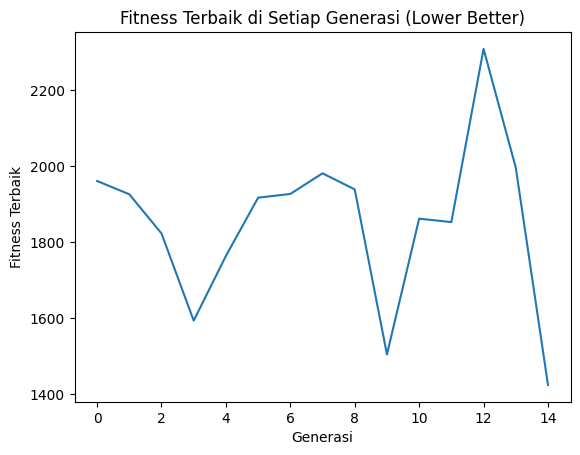

In [ ]:
# Plot sejarah fitness terbaik
plt.plot(best_distance_history)
plt.title("Fitness Terbaik di Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik")
plt.show()

# Test 2

In [ ]:
# Parameter algoritma genetika
population_size = 7
num_generations = 15
crossover_rate = 0.7
mutation_rate = 0.2

# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history = genetic_algorithm_tsp(distance_matrix, population_size, num_generations, mutation_rate)

# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

best_route_cities, best_distance, best_route_history, best_distance_history

Generasi 1:
  Kromosom 1: [2, 4, 3, 5, 1, 0],  Rute: ['Bandung', 'Yogyakarta', 'Semarang', 'Surabaya', 'Serang', 'Jakarta'], Jarak: 1828.8, Fitness: 0.0005468066491688539
  Kromosom 2: [2, 5, 1, 3, 4, 0],  Rute: ['Bandung', 'Surabaya', 'Serang', 'Semarang', 'Yogyakarta', 'Jakarta'], Jarak: 2786, Fitness: 0.0003589375448671931
  Kromosom 3: [2, 4, 0, 3, 1, 5],  Rute: ['Bandung', 'Yogyakarta', 'Jakarta', 'Semarang', 'Serang', 'Surabaya'], Jarak: 2801, Fitness: 0.0003570153516601214
  Kromosom 4: [0, 5, 1, 2, 4, 3],  Rute: ['Jakarta', 'Surabaya', 'Serang', 'Bandung', 'Yogyakarta', 'Semarang'], Jarak: 2409, Fitness: 0.00041511000415110004
  Kromosom 5: [2, 1, 3, 5, 4, 0],  Rute: ['Bandung', 'Serang', 'Semarang', 'Surabaya', 'Yogyakarta', 'Jakarta'], Jarak: 1993, Fitness: 0.0005017561465127947
  Kromosom 6: [4, 1, 3, 0, 5, 2],  Rute: ['Yogyakarta', 'Serang', 'Semarang', 'Jakarta', 'Surabaya', 'Bandung'], Jarak: 3101, Fitness: 0.0003224766204450177
  Kromosom 7: [2, 1, 3, 5, 4, 0],  Rute: ['

(['Jakarta', 'Serang', 'Yogyakarta', 'Semarang', 'Surabaya', 'Bandung'],
 1911.8,
 [[2, 4, 3, 5, 1, 0],
  [4, 0, 2, 1, 3, 5],
  [4, 5, 3, 0, 1, 2],
  [5, 4, 3, 1, 0, 2],
  [2, 1, 0, 4, 5, 3],
  [5, 3, 4, 2, 1, 0],
  [1, 2, 4, 3, 0, 5],
  [1, 2, 0, 3, 4, 5],
  [4, 2, 3, 0, 1, 5],
  [1, 2, 5, 3, 4, 0],
  [3, 4, 1, 0, 2, 5],
  [0, 2, 1, 5, 4, 3],
  [3, 4, 5, 0, 1, 2],
  [5, 4, 3, 0, 2, 1],
  [0, 1, 4, 3, 5, 2]],
 [1828.8,
  1823,
  1436.8,
  1213.8,
  1556.8,
  1197.8,
  1996,
  1286,
  2160.8,
  1984,
  1715.8,
  1699,
  1553.8,
  1286,
  1911.8])

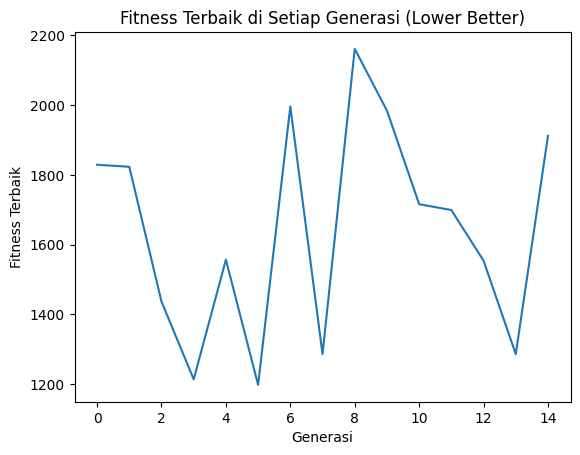

In [ ]:
# Plot sejarah fitness terbaik
plt.plot(best_distance_history)
plt.title("Fitness Terbaik di Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik")
plt.show()

# Test 3

In [ ]:
# Parameter algoritma genetika
population_size = 7
num_generations = 15
crossover_rate = 0.5
mutation_rate = 0.1

# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history = genetic_algorithm_tsp(distance_matrix, population_size, num_generations, mutation_rate)

# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

best_route_cities, best_distance, best_route_history, best_distance_history

Generasi 1:
  Kromosom 1: [4, 2, 3, 5, 1, 0],  Rute: ['Yogyakarta', 'Bandung', 'Semarang', 'Surabaya', 'Serang', 'Jakarta'], Jarak: 2062.8, Fitness: 0.0004847779716889664
  Kromosom 2: [3, 2, 0, 5, 1, 4],  Rute: ['Semarang', 'Bandung', 'Jakarta', 'Surabaya', 'Serang', 'Yogyakarta'], Jarak: 2805, Fitness: 0.00035650623885918
  Kromosom 3: [3, 2, 0, 5, 4, 1],  Rute: ['Semarang', 'Bandung', 'Jakarta', 'Surabaya', 'Yogyakarta', 'Serang'], Jarak: 2268, Fitness: 0.0004409171075837742
  Kromosom 4: [3, 1, 0, 5, 4, 2],  Rute: ['Semarang', 'Serang', 'Jakarta', 'Surabaya', 'Yogyakarta', 'Bandung'], Jarak: 2117.8, Fitness: 0.0004721881197469071
  Kromosom 5: [0, 4, 2, 3, 1, 5],  Rute: ['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Serang', 'Surabaya'], Jarak: 2717, Fitness: 0.000368052999631947
  Kromosom 6: [3, 5, 0, 4, 2, 1],  Rute: ['Semarang', 'Surabaya', 'Jakarta', 'Yogyakarta', 'Bandung', 'Serang'], Jarak: 2336, Fitness: 0.0004280821917808219
  Kromosom 7: [3, 5, 0, 4, 2, 1],  Rute: ['Se

(['Semarang', 'Jakarta', 'Serang', 'Bandung', 'Yogyakarta', 'Surabaya'],
 1489.8,
 [[4, 2, 3, 5, 1, 0],
  [5, 2, 0, 4, 3, 1],
  [4, 3, 1, 2, 0, 5],
  [1, 0, 3, 2, 4, 5],
  [4, 3, 0, 2, 1, 5],
  [5, 1, 3, 4, 0, 2],
  [0, 1, 4, 5, 2, 3],
  [2, 3, 1, 0, 5, 4],
  [3, 5, 4, 1, 0, 2],
  [1, 5, 3, 4, 2, 0],
  [2, 1, 5, 4, 3, 0],
  [1, 2, 0, 4, 3, 5],
  [5, 1, 3, 4, 0, 2],
  [1, 0, 4, 3, 2, 5],
  [3, 0, 1, 2, 4, 5]],
 [2062.8,
  2079,
  1820,
  1623.8,
  1823,
  2234,
  2119.8,
  2078.8,
  1553.8,
  1898,
  1993,
  1432,
  2234,
  1852.8,
  1489.8])

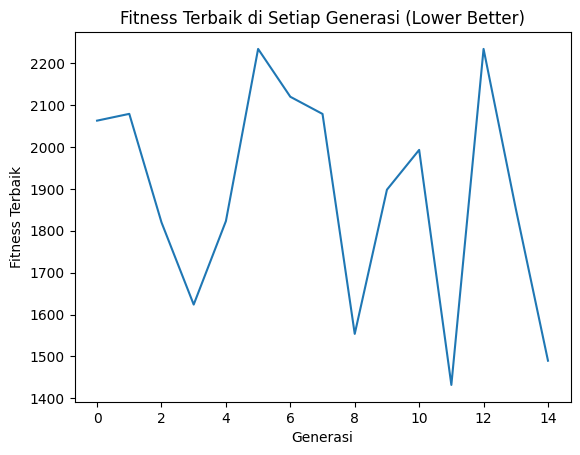

In [ ]:
# Plot sejarah fitness terbaik
plt.plot(best_distance_history)
plt.title("Fitness Terbaik di Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik")
plt.show()

# Test 4

In [ ]:
# Parameter algoritma genetika
population_size = 7
num_generations = 15
crossover_rate = 0.5
mutation_rate = 0.3

# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history = genetic_algorithm_tsp(distance_matrix, population_size, num_generations, mutation_rate)

# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

best_route_cities, best_distance, best_route_history, best_distance_history

Generasi 1:
  Kromosom 1: [0, 2, 1, 5, 3, 4],  Rute: ['Jakarta', 'Bandung', 'Serang', 'Surabaya', 'Semarang', 'Yogyakarta'], Jarak: 1725, Fitness: 0.0005797101449275362
  Kromosom 2: [0, 5, 1, 4, 3, 2],  Rute: ['Jakarta', 'Surabaya', 'Serang', 'Yogyakarta', 'Semarang', 'Bandung'], Jarak: 2781, Fitness: 0.0003595828838547285
  Kromosom 3: [1, 0, 3, 2, 5, 4],  Rute: ['Serang', 'Jakarta', 'Semarang', 'Bandung', 'Surabaya', 'Yogyakarta'], Jarak: 1926.8, Fitness: 0.0005189952252439277
  Kromosom 4: [0, 5, 1, 4, 2, 3],  Rute: ['Jakarta', 'Surabaya', 'Serang', 'Yogyakarta', 'Bandung', 'Semarang'], Jarak: 3054, Fitness: 0.0003274394237066143
  Kromosom 5: [2, 5, 1, 3, 4, 0],  Rute: ['Bandung', 'Surabaya', 'Serang', 'Semarang', 'Yogyakarta', 'Jakarta'], Jarak: 2786, Fitness: 0.0003589375448671931
  Kromosom 6: [0, 5, 1, 4, 2, 3],  Rute: ['Jakarta', 'Surabaya', 'Serang', 'Yogyakarta', 'Bandung', 'Semarang'], Jarak: 3054, Fitness: 0.0003274394237066143
  Kromosom 7: [2, 3, 5, 0, 1, 4],  Rute: ['B

(['Jakarta', 'Serang', 'Surabaya', 'Yogyakarta', 'Semarang', 'Bandung'],
 1763.8,
 [[0, 2, 1, 5, 3, 4],
  [5, 3, 1, 2, 0, 4],
  [5, 3, 1, 2, 4, 0],
  [4, 3, 1, 0, 2, 5],
  [4, 5, 3, 0, 2, 1],
  [0, 1, 2, 3, 5, 4],
  [2, 1, 0, 3, 5, 4],
  [5, 4, 3, 2, 1, 0],
  [2, 1, 0, 3, 4, 5],
  [4, 5, 3, 2, 1, 0],
  [4, 5, 3, 1, 0, 2],
  [5, 2, 0, 4, 3, 1],
  [5, 3, 0, 2, 1, 4],
  [5, 2, 3, 4, 0, 1],
  [0, 1, 5, 4, 3, 2]],
 [1725,
  1823,
  2072,
  1595.8,
  1506,
  1352.8,
  1436.8,
  1132.8,
  1216.8,
  1352.8,
  1433.8,
  2079,
  1823,
  1852.8,
  1763.8])

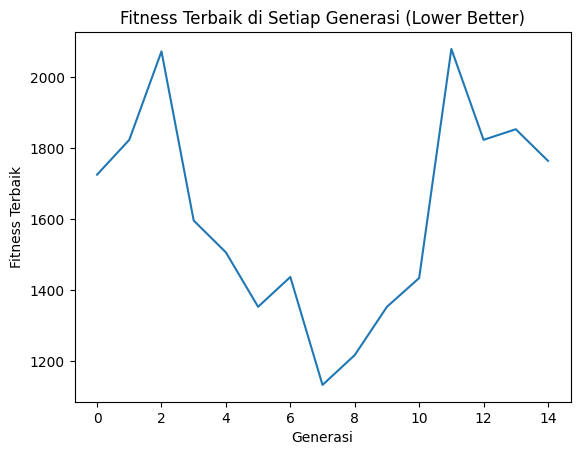

In [ ]:
# Plot sejarah fitness terbaik
plt.plot(best_distance_history)
plt.title("Fitness Terbaik di Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik")
plt.show()